<div class="list-group" id="list-tab" role="tablist">
<a id="10"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0; color:white' role="tab" aria-controls="home"><center>Linear Regression!
 </center></h2>

Kaggle Notebook Link - https://www.kaggle.com/code/vidyalakshmy/linear-regression-tutorials-beginners

**Linear Regression**

`Linear regression` is used for finding linear relationship between `target` and one or more `predictors`. 

There are two types of **Linear Regression**:

1. Simple Linear Regression 
2. Multiple Linear Regression.

The core idea is to obtain a line that `best fits` the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. 

`Error` is the distance between the point to the regression line.

Example of Linear Regression below:

<img src = "https://miro.medium.com/max/875/1*dToo8pNrhBmYfwmPLp6WrQ.png">

### Example - Simple Linear Regression

Assume we have a dataset which contains information about relationship between `number of hours studied` and `marks obtained`. 

Many students have been observed and their hours of study and grade are recorded. 

Our goal is to design a model that can predict marks if given the number of hours studied. 

Using the training data, a regression line is obtained which will give minimum error. 

This linear equation is then used for any new data. That is, if we give number of hours studied by a student as an input, our model should predict their mark with minimum error.

**Y(pred) = b0 + b1*x**

**The values b0(intercept) and b1(slope) must be chosen so that they minimize the error.**

As discussed earlier, the goal is to find the `best fit line` which can be achieved by minimising the expression of **RSS (Residual Sum of Squares)** which is equal to the sum of squares of the residual for each data point in the plot. 

Residuals for any data point is found by subtracting predicted value of dependent variable from actual value of dependent variable.


# Multiple Linear Regression

Multiple linear regression is a statistical technique to understand the relationship between one dependent
variable and several independent variables (explanatory variables).

The objective of multiple regression is to find a linear equation that can best determine the value of
dependent variable Y for different values independent variables in X.

Consider another example where we need to make sales prediction using TV Marketing budget. 

In real life scenario, the marketing head would want to look into the dependency of sales on the budget allocated to different
marketing sources. Here, we have considered three different marketing sources, i.e. TV marketing, Radio
marketing, and Newspaper marketing.

The simple linear regression model is built on a straight line which has the following formula:
**Y(pred) = b0 + b1*x**

Multiple linear regression also uses a linear model that can be formulated in a very similar way.

In [25]:
## Importing the required libraries

import numpy as np   ## numerical calculations 
import pandas as pd   ## hadling dataframes
import seaborn as sns   ## graphs
import matplotlib.pyplot as plt  ## graphs
from colorama import Fore, Back, Style
from statsmodels.stats.outliers_influence import variance_inflation_factor  ### modelling
import warnings  
warnings.filterwarnings("ignore")

In [27]:
## Reading the csv data
data = pd.read_csv("insurance.csv")
data.head()  ## print the first 5 rows for you to see and understand the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Here,
* Independent Variables- age,sex,children,smoker,region
* Dependent Variable- charges

In [28]:
data.shape  ## rows and columns in the dataset

(1338, 7)

In [4]:
## Checking for null values in the data

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.info()

## EDA -- EXPLORATORY DATA ANALYSIS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [29]:
data.describe() ## only for numerical columns statistical analysis

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [30]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


### Univariate Analysis of each column

Data has 
* 4 Numerical columns-age,bmi,children,charges
* 3 Categorical columns-sex,smoker,region

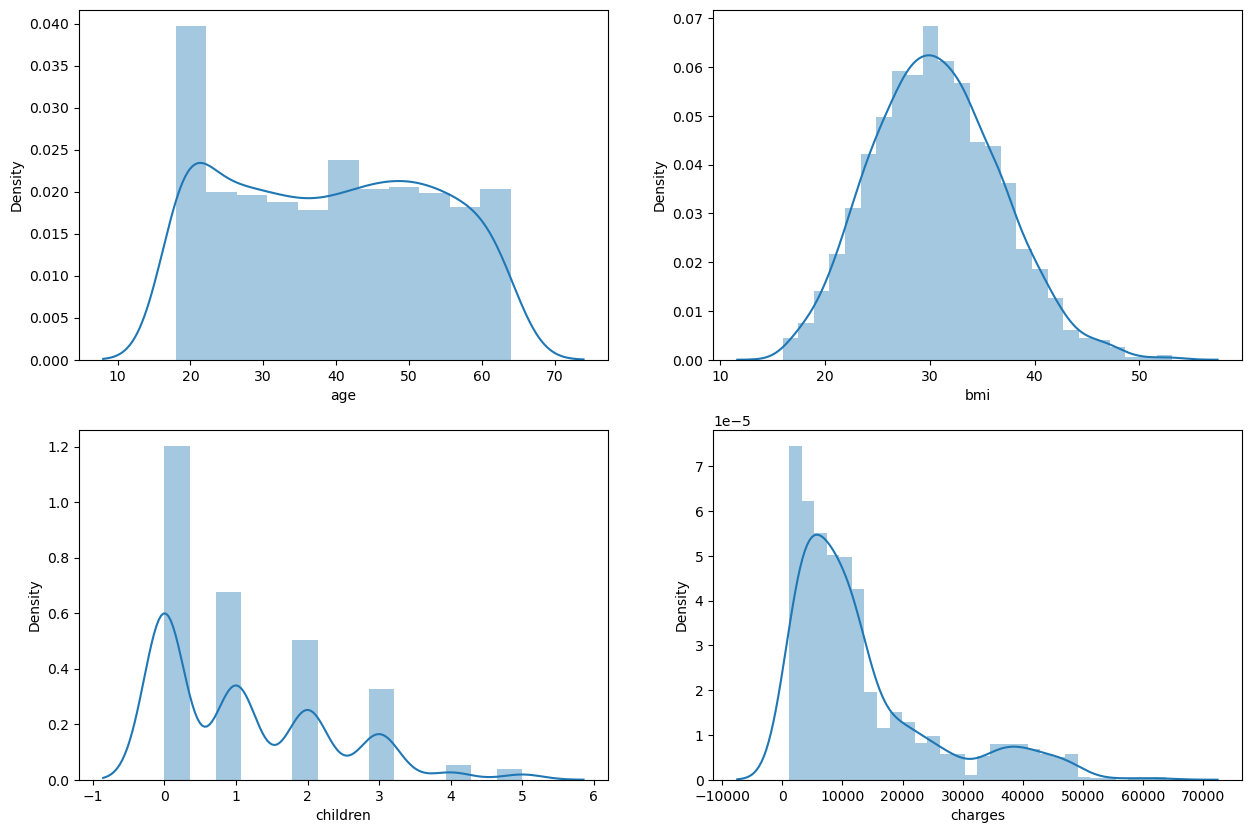

In [7]:
## Univariate analysis of Numeric Columns

num_cols=['age','bmi','children','charges']

plt.figure(figsize=(15,10))
for i,j in enumerate(num_cols):
    plt.subplot(2,2,i+1)
    sns.distplot(data[j])

male      676
female    662
Name: sex, dtype: int64 

no     1064
yes     274
Name: smoker, dtype: int64 

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64 



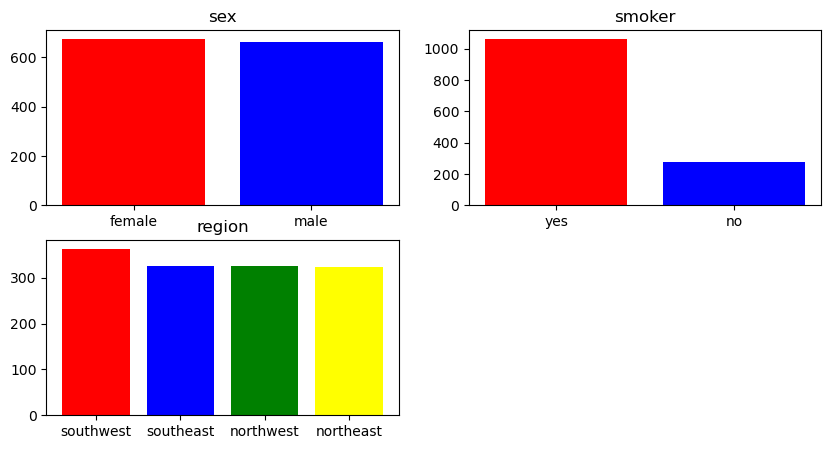

In [8]:
## Univariate analysis of Categorical Columns

cat_cols=['sex','smoker','region']

plt.figure(figsize=(10,5))
for i,j in enumerate(cat_cols):
    print(data[j].value_counts(),"\n")
    plt.subplot(2,2,i+1)
    plt.title(j,loc='Center')
    plt.bar(data[j].unique(),data[j].value_counts(),color=['red','blue','green','yellow'])

### Bivariate Analysis

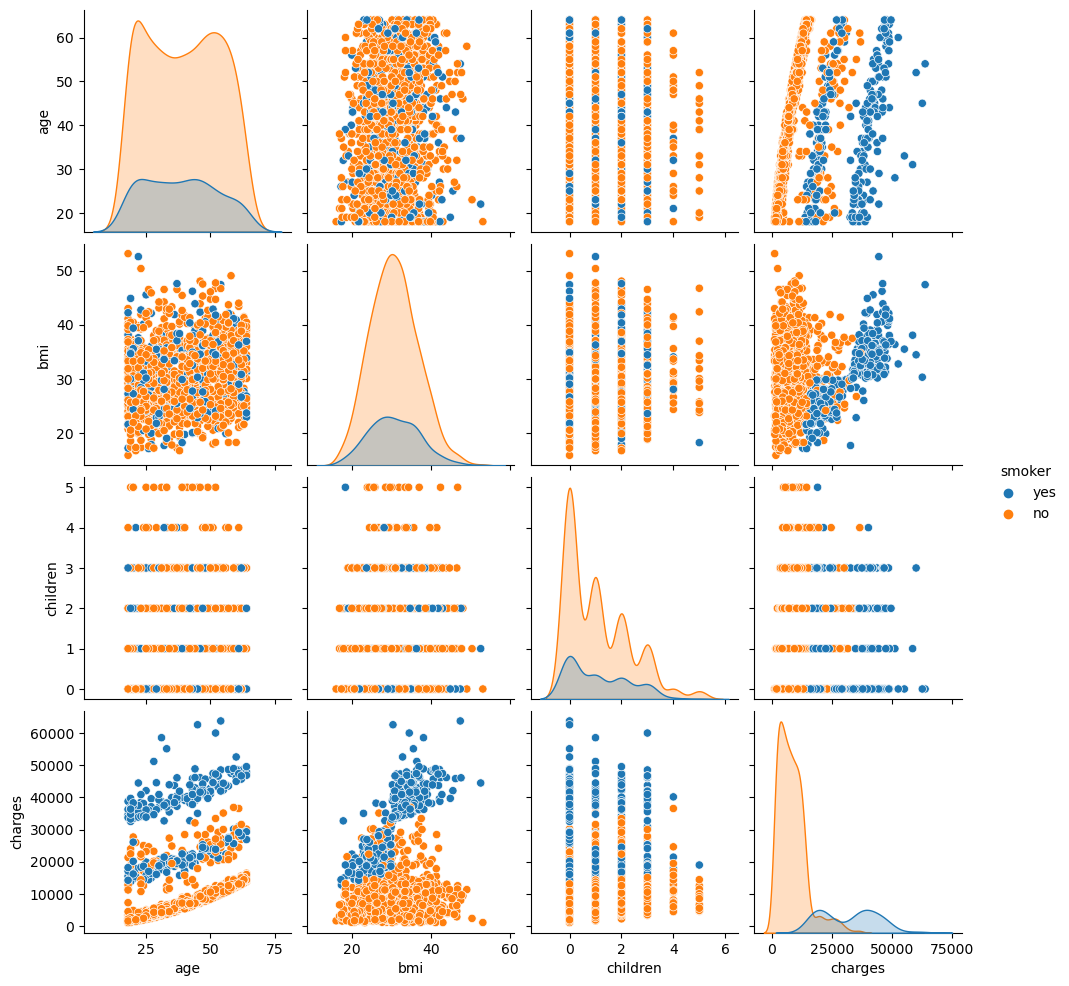

In [9]:
## A pairwise comparison is done for every numeric column in the data 
## hue defines based on which categorical column color needs to be provided in data

sns.pairplot(data,hue='smoker')

* From the pairplot BMI and charges it can be interpreted that people with higher charges are smokers.
* From the pairplot BMI and age it can be seen that these 2 are highly correlated.

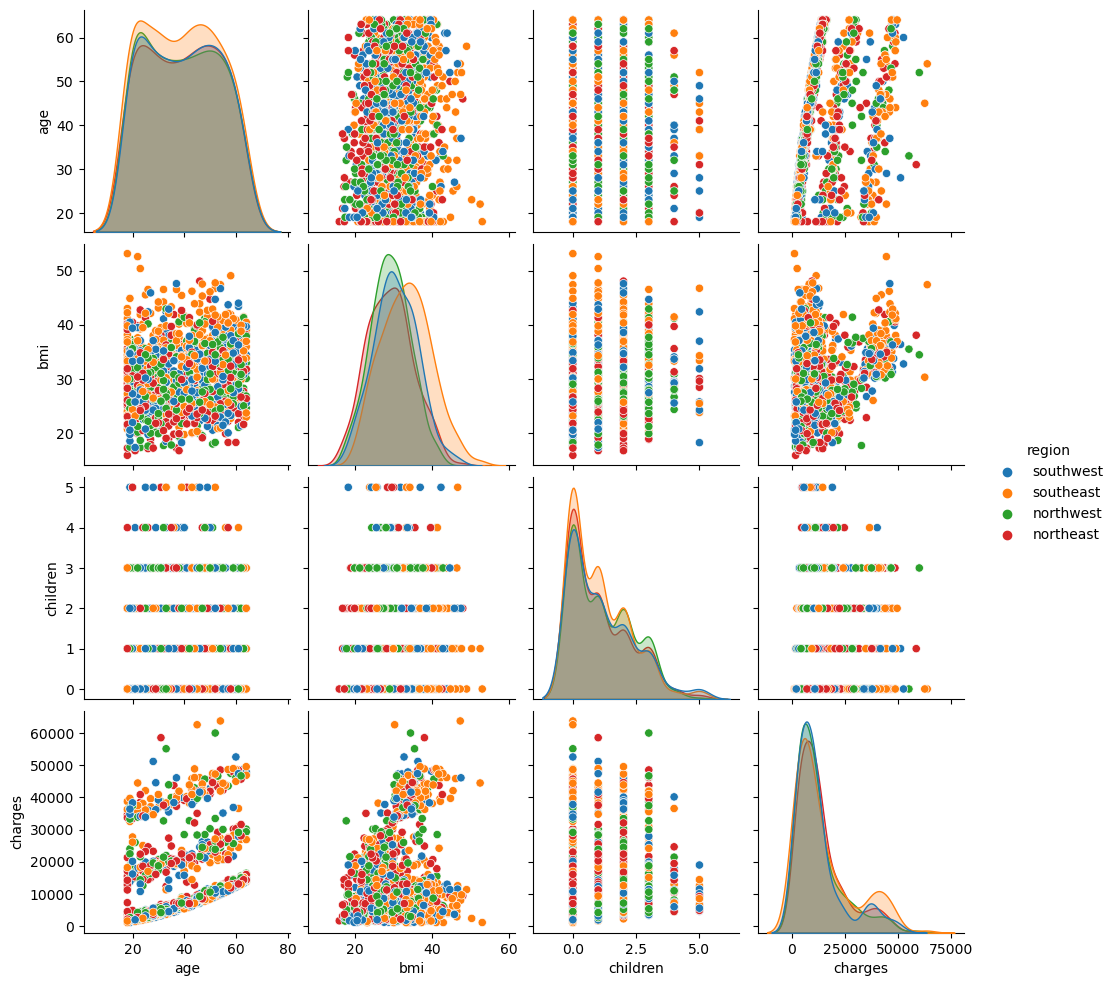

In [10]:
sns.pairplot(data,hue='region')

### Correlation Matrix

We create a correlation matrix and look for the linear dependencies.A large value in this matrix would indicate a pair of highly correlated variables.

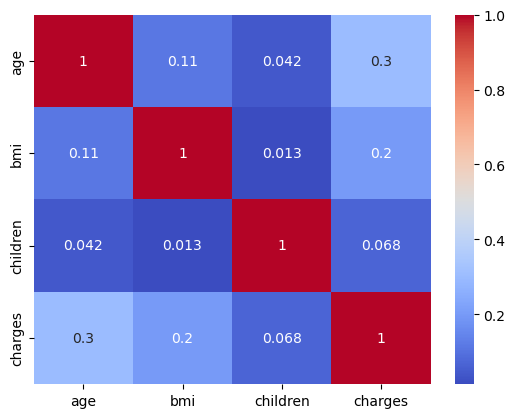

In [11]:
corrMatrix = data[num_cols].corr()
sns.heatmap(corrMatrix,cmap='coolwarm',annot=True)
plt.show()

## correlation is very very important.

## select a few best predictor only
1. it will tell me which predictor is most correlated to my target column. That variable will be most important.
2. corr matrix is used for feature/predictor selection.
3. we have to avoid predictors who are inter correlated with themselves.

### Building the Model

In [33]:
## Converting all the categorical columns to type "Category" and assigning cat.codes to each values

data.sex = data.sex.astype("category")
data.sex =data.sex.cat.codes + 1
    
    
data.region = data.region.astype("category")
data.region = data.region.cat.codes + 1

data.smoker = data.smoker.astype("category")
data.smoker = data.smoker.cat.codes + 1

In [31]:
# ### Scaling all the Numeric values

# # scale numeric features
# scale = ['age','bmi','children']

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# # Apply scaler() to all the columns
# data[scale] = scaler.fit_transform(data[scale])

In [35]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,2,4,16884.9240
1,18,2,33.77,1,1,3,1725.5523
2,28,2,33.00,3,1,3,4449.4620


In [34]:
data.describe()  ## numerical columns

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,1.505232,30.663397,1.094918,1.204783,2.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,1.000000,15.960000,0.000000,1.000000,1.000000,1121.873900
25%,27.000000,1.000000,26.296250,0.000000,1.000000,2.000000,4740.287150
50%,39.000000,2.000000,30.400000,1.000000,1.000000,3.000000,9382.033000
75%,51.000000,2.000000,34.693750,2.000000,1.000000,3.000000,16639.912515
max,64.000000,2.000000,53.130000,5.000000,2.000000,4.000000,63770.428010


In [ ]:
## data exploration
## data preparation
## model training

In [15]:
X = data.drop('charges',axis=1) ## axis = 1 means column --> 
y = data.charges 

In [16]:
## Splitting the data into train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , random_state=100) ## randomly select traina nd test data

In [17]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()  # loading the model

#You don't need to specify an object to save the result because 'lr' will take the results of the fitted model.
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
# Print the intercept and coefficients  a0, a1 --> slope and the intercepts
print(lr.intercept_)
print(lr.coef_)

-14076.657560841619
[ 3.70813895e+03  1.34329927e+01  1.88187103e+03  5.71931894e+02
  2.34783078e+04 -3.85005527e+02]


In [39]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)
#y_pred

Text(0.5, 0, 'Index')

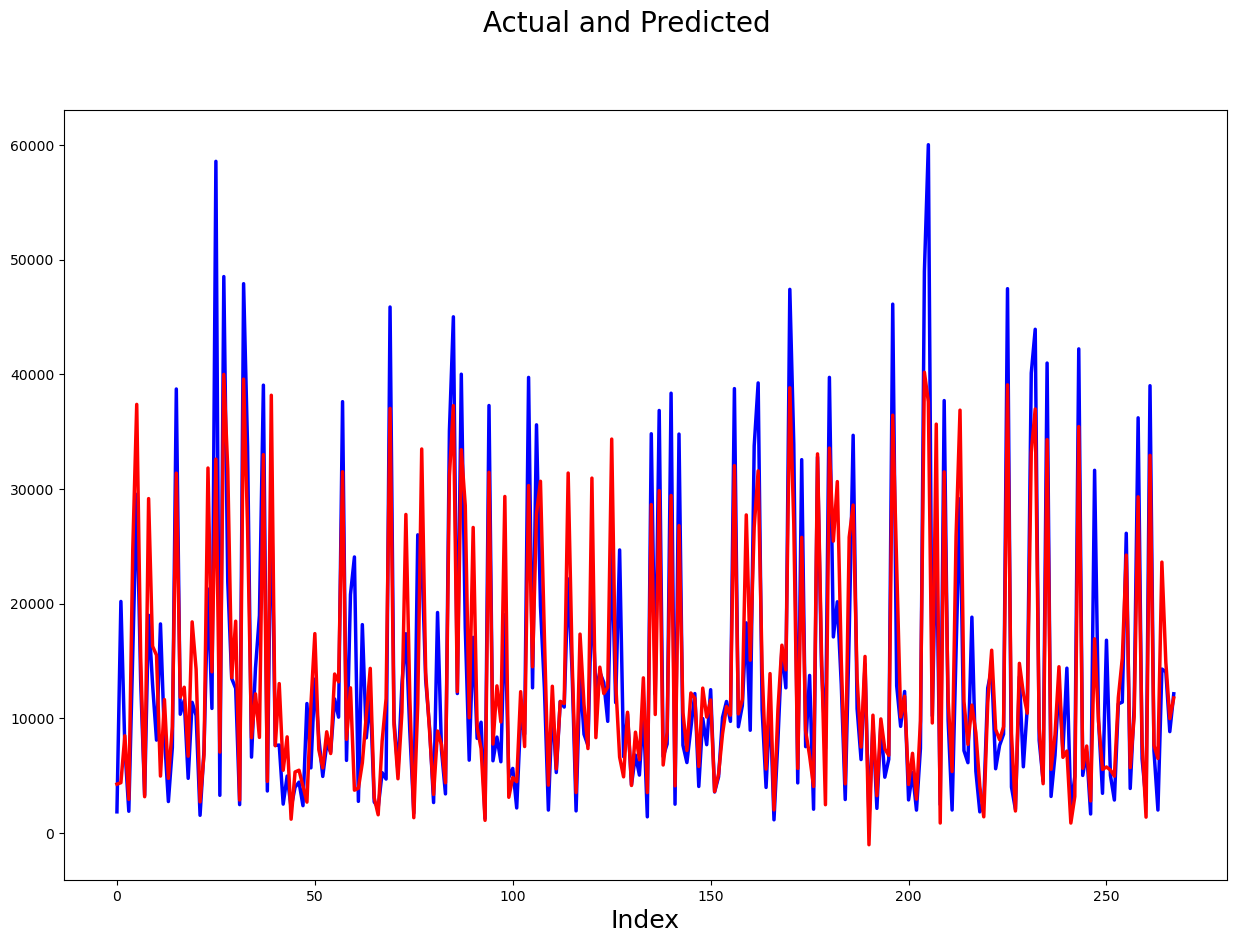

In [20]:
## Visualising the actual and Predicted values

plt.figure(figsize = (15,10))

c = [i for i in range(len(X_test.index))] # generating index

plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="-")
plt.suptitle('Actual and Predicted', fontsize=20) 
plt.xlabel('Index', fontsize=18) 

### Model Evaluation

There are various metrics used to evaluate the performance of the model :

* Mean Squared Error(MSE)
* Root-Mean-Squared-Error(RMSE).
* Mean-Absolute-Error(MAE).
* R² or Coefficient of Determination.
* Adjusted R²

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)  ## avg of the sq of the errors , iyt should be minimum
print('r_square_value :',r_squared)  ## how well my predictors explained the traget variable , should be close to 1

## error should be minimum
## what is this error , error = actual value - predicted value = avg (y_test - y_pred)^2   

Mean_Squared_Error : 32263849.086835094
r_square_value : 0.7942462599118463


The r square value is about 80% which means our model is able to explain 80% of the variance which is good.

For further refining of the model multicolinearity can be removed by dropping variables with high VIF values and high p values.
such variables can be dropped and model can be retrained to improve the performance

### Multicolinearity

It is possible for collinearity to exist between three or more variables even if no pair of variables has a high correlation. This situation is called multicollinearity, it can be calculated using VIF (Variance Inflation Factor).

A variable with a high VIF means it can be largely explained by other independent variables. Thus, you have to check and remove variables with a high VIF after checking for low-pvalues.

In [22]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = data.columns
vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,smoker,20.25
1,sex,7.43
6,charges,7.11
5,region,5.33
0,age,1.28
2,bmi,1.15
3,children,1.01


In [23]:
data.values

array([[-1.43876426e+00,  1.00000000e+00, -4.53320001e-01, ...,
         2.00000000e+00,  4.00000000e+00,  1.68849240e+04],
       [-1.50996545e+00,  2.00000000e+00,  5.09621097e-01, ...,
         1.00000000e+00,  3.00000000e+00,  1.72555230e+03],
       [-7.97953548e-01,  2.00000000e+00,  3.83306847e-01, ...,
         1.00000000e+00,  3.00000000e+00,  4.44946200e+03],
       ...,
       [-1.50996545e+00,  1.00000000e+00,  1.01487810e+00, ...,
         1.00000000e+00,  3.00000000e+00,  1.62983350e+03],
       [-1.29636188e+00,  1.00000000e+00, -7.97813410e-01, ...,
         1.00000000e+00,  4.00000000e+00,  2.00794500e+03],
       [ 1.55168573e+00,  1.00000000e+00, -2.61387960e-01, ...,
         2.00000000e+00,  2.00000000e+00,  2.91413603e+04]])

In [24]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,smoker,6.69
1,sex,6.60
5,region,4.99
2,bmi,1.03
0,age,1.01
3,children,1.00
